In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
class AnalysisSettings():
    def __init__(self, dataset) -> None:
        self.dataset = dataset
        self.epoch_step = 10
        match dataset:
            case 'mnist':
                self.stopping_accuracy = 0.75
            case _:
                self.stopping_accuracy = 0.8
                

settings = AnalysisSettings('iris')

In [41]:
output = []

## SE1: Equal epochs

In [42]:
epoch_df = pd.read_csv('./experiments/flops/results/'+settings.dataset+'/epoch_stopping.csv', index_col='agent')

In [43]:
# Mean flops performed over training 
print('PCNs')
pcn_avg_training_flops = epoch_df['pcn_tflops'].mean()
print(f'Avg cumulative flops from training PCN model: {pcn_avg_training_flops}\n')

pcn_eval_train_flops = epoch_df['pcn_train_flops'].mean()
pcn_eval_train_acc = epoch_df['pcn_train_acc'].mean()
print(f'Avg flops performed during eval on train split: {pcn_eval_train_flops}')
print(f'Avg accuracy on train split: {pcn_eval_train_acc}\n')

pcn_eval_test_flops = epoch_df['pcn_test_flops'].mean()
pcn_eval_test_acc = epoch_df['pcn_test_acc'].mean()
print(f'Avg flops performed during eval on test split: {pcn_eval_test_flops}')
print(f'Avg accuracy on test split: {pcn_eval_test_acc}\n')

print('\nANNs')
ann_avg_training_flops = epoch_df['ann_tflops'].mean()
print(f'Average cumulative flops from trianing ANN model: {ann_avg_training_flops}\n')

ann_eval_train_flops = epoch_df['ann_train_flops'].mean()
ann_eval_train_acc = epoch_df['ann_train_acc'].mean()
print(f'Flops performed during eval of train split: {ann_eval_train_flops}')
print(f'Avg accuracy on train split: {ann_eval_train_acc}\n')


ann_eval_test_flops = epoch_df['ann_test_flops'].mean()
ann_eval_test_acc = epoch_df['ann_test_acc'].mean()
print(f'Flops performed during eval of test split: {ann_eval_test_flops}')
print(f'Avg accuracy on test split: {ann_eval_test_acc}\n')

output += [ann_avg_training_flops, ann_eval_train_flops, ann_eval_train_acc, ann_eval_test_flops, ann_eval_test_acc, pcn_avg_training_flops, pcn_eval_train_flops, pcn_eval_train_acc, pcn_eval_test_flops, pcn_eval_test_acc]


PCNs
Avg cumulative flops from training PCN model: 1840148239617.4

Avg flops performed during eval on train split: 45319400290.9
Avg accuracy on train split: 0.713125

Avg flops performed during eval on test split: 11256956848.2
Avg accuracy on test split: 0.706


ANNs
Average cumulative flops from trianing ANN model: 99662256000.0

Flops performed during eval of train split: 1228448801.0
Avg accuracy on train split: 0.7681250000000001

Flops performed during eval of test split: 307112201.0
Avg accuracy on test split: 0.7625



## SE2: Equal flops

In [44]:
flop_df = pd.read_csv('./experiments/flops/results/'+settings.dataset+'/flop_stopping.csv', index_col='agent')

In [45]:
# Mean flops performed over training 
print('PCNs')
pcn_train_epochs = flop_df['pcn_epochs'].iloc[0]
print(f'Number of epochs performed: {pcn_train_epochs}')
pcn_avg_training_flops = flop_df['pcn_tflops'].mean()
print(f'Avg cumulative flops from training PCN model: {pcn_avg_training_flops}\n')

pcn_eval_train_flops = flop_df['pcn_train_flops'].mean()
pcn_eval_train_acc = flop_df['pcn_train_acc'].mean()
print(f'Avg flops performed during eval on train split: {pcn_eval_train_flops}')
print(f'Avg accuracy on train split: {pcn_eval_train_acc}\n')

pcn_eval_test_flops = flop_df['pcn_test_flops'].mean()
pcn_eval_test_acc = flop_df['pcn_test_acc'].mean()
print(f'Avg flops performed during eval on test split: {pcn_eval_test_flops}')
print(f'Avg accuracy on test split: {pcn_eval_test_acc}\n')

print('\nANNs')
ann_train_epochs = flop_df['ann_epochs'].iloc[0]
print(f'Number of epochs performed: {ann_train_epochs}')
ann_avg_training_flops = flop_df['ann_tflops'].mean()
print(f'Average cumulative flops from trianing ANN model: {ann_avg_training_flops}\n')

ann_eval_train_flops = flop_df['ann_train_flops'].mean()
ann_eval_train_acc = flop_df['ann_train_acc'].mean()
print(f'Flops performed during eval of train split: {ann_eval_train_flops}')
print(f'Avg accuracy on train split: {ann_eval_train_acc}\n')


ann_eval_test_flops = flop_df['ann_test_flops'].mean()
ann_eval_test_acc = flop_df['ann_test_acc'].mean()
print(f'Flops performed during eval of test split: {ann_eval_test_flops}')
print(f'Avg accuracy on test split: {ann_eval_test_acc}\n')

output += [ann_avg_training_flops, ann_train_epochs, ann_eval_train_flops, ann_eval_train_acc, ann_eval_test_flops, ann_eval_test_acc, pcn_avg_training_flops, pcn_train_epochs, pcn_eval_train_flops, pcn_eval_train_acc, pcn_eval_test_flops, pcn_eval_test_acc]

PCNs
Number of epochs performed: 30.0
Avg cumulative flops from training PCN model: 1834788412677.8

Avg flops performed during eval on train split: 44632065865.9
Avg accuracy on train split: 0.7073750000000001

Avg flops performed during eval on test split: 11115767164.4
Avg accuracy on test split: 0.6925000000000001


ANNs
Number of epochs performed: 570.0
Average cumulative flops from trianing ANN model: 1893582864000.0

Flops performed during eval of train split: 1228448801.0
Avg accuracy on train split: 0.974

Flops performed during eval of test split: 307112201.0
Avg accuracy on test split: 0.9700000000000001



## SE3: Equal accuracy

In [46]:
acc_df = pd.read_csv('./experiments/flops/results/'+settings.dataset+'/acc_stopping/main.csv', index_col='agent')
acc_anns = pd.read_csv('./experiments/flops/results/'+settings.dataset+'/acc_stopping/anns.csv')
acc_pcns = pd.read_csv('./experiments/flops/results/'+settings.dataset+'/acc_stopping/pcns.csv')

In [47]:
# Mean flops performed over training 
print('PCNs')
pcn_train_epochs = acc_df['pcn_epochs'].iloc[0]
print(f'Number of epochs performed: {pcn_train_epochs}')
pcn_avg_training_flops = acc_df['pcn_tflops'].mean()
print(f'Avg cumulative flops from training PCN model: {pcn_avg_training_flops}\n')

pcn_eval_train_flops = acc_df['pcn_train_flops'].mean()
pcn_eval_train_acc = acc_df['pcn_train_acc'].mean()
print(f'Avg flops performed during eval on train split: {pcn_eval_train_flops}')
print(f'Avg accuracy on train split: {pcn_eval_train_acc}\n')

pcn_eval_test_flops = acc_df['pcn_test_flops'].mean()
pcn_eval_test_acc = acc_df['pcn_test_acc'].mean()
print(f'Avg flops performed during eval on test split: {pcn_eval_test_flops}')
print(f'Avg accuracy on test split: {pcn_eval_test_acc}\n')

print('\nANNs')
ann_train_epochs = acc_df['ann_epochs'].iloc[0]
print(f'Number of epochs performed: {ann_train_epochs}')
ann_avg_training_flops = acc_df['ann_tflops'].mean()
print(f'Average cumulative flops from trianing ANN model: {ann_avg_training_flops}\n')

ann_eval_train_flops = acc_df['ann_train_flops'].mean()
ann_eval_train_acc = acc_df['ann_train_acc'].mean()
print(f'Flops performed during eval of train split: {ann_eval_train_flops}')
print(f'Avg accuracy on train split: {ann_eval_train_acc}\n')


ann_eval_test_flops = acc_df['ann_test_flops'].mean()
ann_eval_test_acc = acc_df['ann_test_acc'].mean()
print(f'Flops performed during eval of test split: {ann_eval_test_flops}')
print(f'Avg accuracy on test split: {ann_eval_test_acc}\n')

output += [ann_avg_training_flops, ann_train_epochs, ann_eval_train_flops, ann_eval_train_acc, ann_eval_test_flops, ann_eval_test_acc, pcn_avg_training_flops, pcn_train_epochs, pcn_eval_train_flops, pcn_eval_train_acc, pcn_eval_test_flops, pcn_eval_test_acc]


PCNs
Number of epochs performed: 10.0
Avg cumulative flops from training PCN model: 754315761030.7

Avg flops performed during eval on train split: 61111390589.3
Avg accuracy on train split: 0.798

Avg flops performed during eval on test split: 15293477022.4
Avg accuracy on test split: 0.8009999999999999


ANNs
Number of epochs performed: 30.0
Average cumulative flops from trianing ANN model: 99662256000.0

Flops performed during eval of train split: 1228448801.0
Avg accuracy on train split: 0.774125

Flops performed during eval of test split: 307112201.0
Avg accuracy on test split: 0.7665



Analyzing the average trend of flops performed as epoch increases for the pcn agents 

In [48]:
ann_accs = acc_anns.filter(regex='.*acc[0-9]', axis=1)
ann_accs.set_index(np.array(range(ann_accs.shape[0])) * settings.epoch_step + settings.epoch_step, inplace=True)
ann_flops = acc_anns.filter(regex='.*flop[0-9]', axis=1)

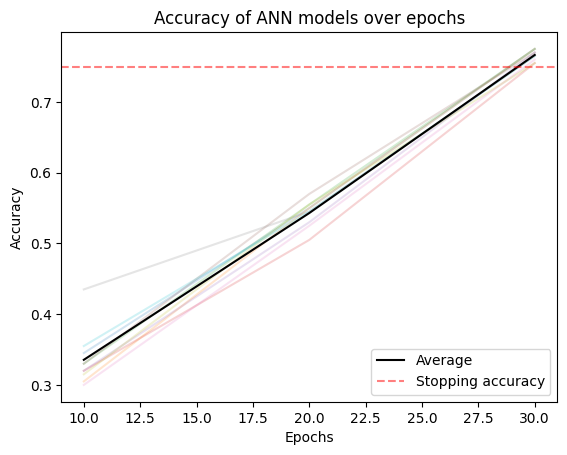

In [49]:
# Plotting the accuracy of the models over the epochs
plt.title('Accuracy of ANN models over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(ann_accs, alpha=0.2)
plt.plot(ann_accs.mean(axis=1), color='black', linestyle='-', label='Average')
plt.axhline(y=settings.stopping_accuracy, color='r', linestyle='dashed', label='Stopping accuracy', alpha=0.5)
plt.legend(loc='lower right')
plt.savefig('./image/'+settings.dataset+'_ann_epoch_accuracy.png')
plt.show()

In [50]:
pcn_accs = acc_pcns.filter(regex='.*acc[0-9]', axis=1)
pcn_accs.set_index(np.array(range(pcn_accs.shape[0]))*10 + 10, inplace=True)
pcn_flops = acc_pcns.filter(regex='.*flop[0-9]', axis=1)
pcn_flops.set_index(np.array(range(pcn_flops.shape[0]))*10 + 10, inplace=True)

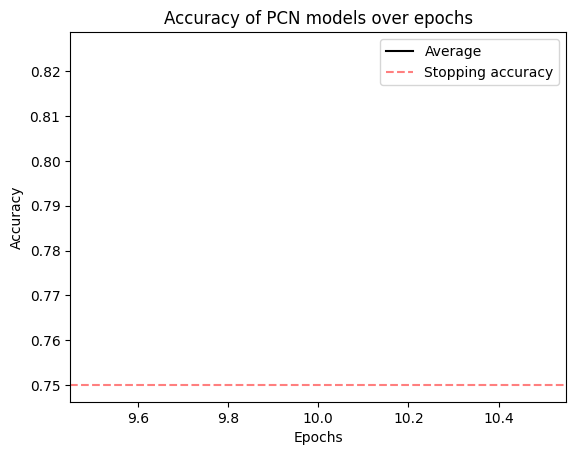

In [51]:
# Plotting the accuracy of the models over the epochs

plt.title('Accuracy of PCN models over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(pcn_accs, alpha=0.2)
plt.plot(pcn_accs.mean(axis=1), color='black', label='Average')
plt.axhline(settings.stopping_accuracy, color='red', linestyle='dashed', label='Stopping accuracy', alpha=0.5)
plt.legend()
plt.savefig('./image/' + settings.dataset + '_pcn_epoch_accuracy.png')
plt.show()


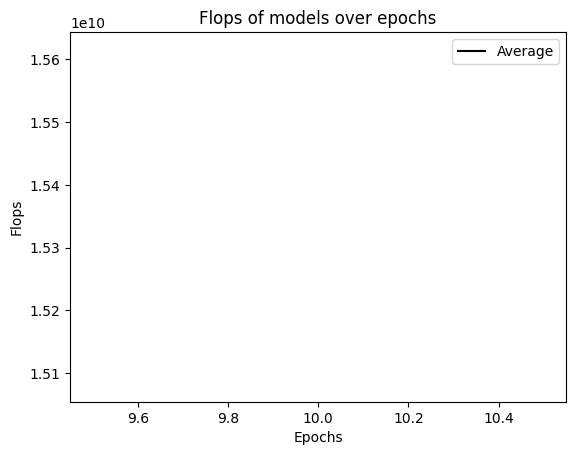

In [52]:
# Plotting the flops of the models over the epochs
plt.title('Flops of models over epochs')
plt.xlabel('Epochs')
plt.ylabel('Flops')
plt.plot(pcn_flops, alpha=0.2)
plt.plot(pcn_flops.mean(axis=1), color='black', label='Average', linestyle='-')

plt.legend()
plt.savefig('./image/' + settings.dataset + '_pcn_epoch_flops.png')
plt.show()

In [53]:
# saving results of mean values to csv file

indexes = [
        # SE1
            # ANN
            'SE1_train_flops_ann',
            'SE1_eval_train_flops_ann',
            'SE1_eval_train_acc_ann',
            'SE1_eval_test_flops_ann',
            'SE1_eval_test_acc_ann',
            # PCN
            'SE1_train_flops_pcn',
            'SE1_eval_train_flops_pcn',
            'SE1_eval_train_acc_pcn',
            'SE1_eval_test_flops_pcn',
            'SE1_eval_test_acc_pcn',
        # SE2
            # ANN
            'SE2_train_flops_ann',
            'SE2_train_epochs_ann',
            'SE2_eval_train_flops_ann',
            'SE2_eval_train_acc_ann',
            'SE2_eval_test_flops_ann',
            'SE2_eval_test_acc_ann',
            # PCN
            'SE2_train_flops_pcn',
            'SE2_train_epochs_pcn',
            'SE2_eval_train_flops_pcn',
            'SE2_eval_train_acc_pcn',
            'SE2_eval_test_flops_pcn',
            'SE2_eval_test_acc_pcn',
        # SE3
            # ANN
            'SE3_train_flops_ann',
            'SE3_train_epochs_ann',
            'SE3_eval_train_flops_ann',
            'SE3_eval_train_acc_ann',
            'SE3_eval_test_flops_ann',
            'SE3_eval_test_acc_ann',
            # PCN
            'SE3_train_flops_pcn',
            'SE3_train_epochs_pcn',
            'SE3_eval_train_flops_pcn',
            'SE3_eval_train_acc_pcn',
            'SE3_eval_test_flops_pcn',
            'SE3_eval_test_acc_pcn',
           ]

df = pd.DataFrame(index=indexes, columns=[settings.dataset], data=output)

In [54]:
df2 = pd.read_csv('./experiments/flops/results/analysis.csv', index_col='Unnamed: 0')
df2[settings.dataset] = df[settings.dataset]
df2.to_csv('./experiments/flops/results/analysis.csv')

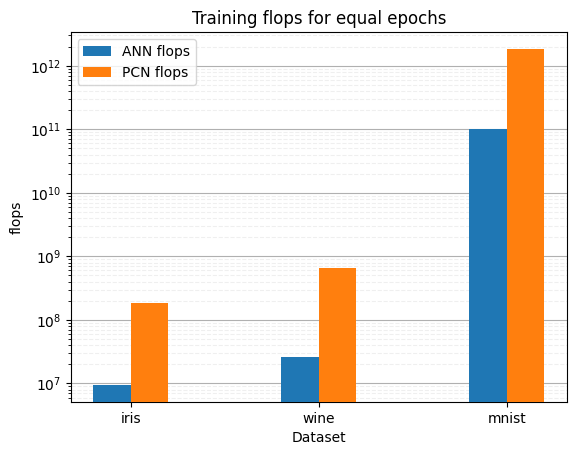

In [104]:
# Numbers of pairs of bars you want
experiment = 'SE1'
experiment_title = {'SE1': 'epochs', 'SE2': 'flops', 'SE3': 'accuracy'}
datasets = ['iris', 'wine', 'mnist']

N = len(datasets)

# Data on X-axis

# Specify the values of blue bars (height)
ann_flops = df2.loc[[f'{experiment}_train_flops_ann'], datasets].values[0]
# Specify the values of orange bars (height)
pcn_flops = df2.loc[[f'{experiment}_train_flops_pcn'], datasets].values[0]

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
# plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.2       

# Plotting
plt.bar(ind, ann_flops.tolist() , width, label='ANN flops', zorder=3)
plt.bar(ind + width, pcn_flops.tolist(), width, label='PCN flops', zorder=3)

# Adjusting y-axis
plt.yscale('log')

plt.xlabel('Dataset')
plt.ylabel('flops')
plt.title('Training flops for equal '+experiment_title[experiment])

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, datasets)


# Finding the best position for legends and putting it
plt.grid(axis='y', linestyle='--', which='both', zorder=0, alpha=0.2)
plt.grid(axis='y', linestyle='-', zorder=0, alpha=1)
plt.legend(loc='best')
plt.show()
# plt.savefig('./image/flops_per_dataset_'+experiment_title[experiment]+'.png')

In [81]:
pd.set_option('display.precision', 3)
experiment = 'SE2'
split = 'test'
df2.loc[[f'{experiment}_eval_{split}_acc_ann', f'{experiment}_eval_{split}_acc_pcn'], :].values

array([[0.785, 0.972, 0.97 ],
       [0.745, 0.925, 0.693]])

In [85]:
df2.loc[['SE2_train_flops_ann', 'SE2_train_flops_pcn']].values

array([[1.705e+08, 6.738e+08, 1.894e+12],
       [1.649e+08, 6.652e+08, 1.835e+12]])

In [72]:
array([[0.785, 0.972, 0.97 ],
       [0.745, 0.925, 0.693]])

array([[0.364, 0.401, 0.768],
       [0.793, 0.923, 0.713]])

In [118]:
#Calculting mean log difference in training flops
se2_ann_flops = df2.loc[['SE1_train_flops_ann'], :].values
se2_pcn_flops = df2.loc[['SE1_train_flops_pcn'], :].values

# np.mean(np.log(se2_pcn_flops, axis=1) - np.log(se2_ann_flops, axis=1))

np.mean(np.log10(se2_pcn_flops) - np.log10(se2_ann_flops))

1.3177246691790978